In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import chi2
from scipy.stats import norm

# Remuestreo

In [10]:
sample = np.array([0.974,0.950,0.932,1.104,1.038,0.920,0.935,0.907,0.810,0.915])

In [22]:
media = np.mean(sample)
print(media)

0.9484999999999999


In [31]:
def Bootstrapping(sample):
    resample = np.random.choice( sample, size=len(sample), replace=True )
    return resample

In [35]:
N = 100000

ValoresMedios = np.zeros( N )

for i in tqdm(range(N)):
    resample = Bootstrapping(sample)
    ValoresMedios[i] = np.mean(resample)

100%|██████████| 100000/100000 [00:06<00:00, 14430.19it/s]


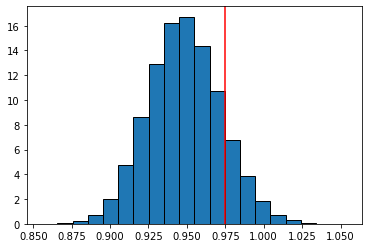

In [45]:
plt.hist(ValoresMedios, bins=20, density=True, ec='k');
plt.axvline(x =0.975, color='r' )

In [43]:
mean = np.percentile(ValoresMedios,50)
print(mean)

0.9478000000000002


In [51]:
q = np.quantile( a = ValoresMedios, q=[0.16,0.84] )
q1 = np.quantile( a = ValoresMedios, q=[0.023,0.977] )

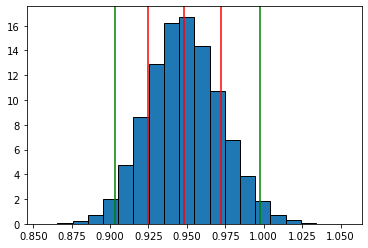

In [52]:
plt.hist(ValoresMedios, bins=20, density=True, ec='k');
plt.axvline(x = mean, color='r' )
plt.axvline(x =q[0], color='r' )
plt.axvline(x =q[1], color='r' )
plt.axvline(x =q1[0], color='g' )
plt.axvline(x =q1[1], color='g' )

In [50]:
error_inf = mean-q[0]
error_sup = q[1] - mean
print(error_inf,error_sup)

0.022900000000000142 0.024199999999999666


$$ \hat{\mu} = 0.9478_{-0.0229}^{+0.0241} $$ al 68% de nivel de confianza

In [53]:
error_inf = mean-q1[0]
error_sup = q1[1] - mean
print(error_inf,error_sup)

0.04490000000000016 0.049599999999999866


$$ \hat{\mu} = 0.9478_{-0.0449}^{+0.0495} $$ al 95% de nivel de confianza

In [58]:
1 - norm.cdf(5)

2.866515719235352e-07

In [60]:
file = '../Data/Sesion6/MinimosCuadratico.txt'

In [91]:
data = np.loadtxt(file)
#print(data)
x = data[:,0]
y = data[:,1]
N = len(x)
print(N)

20


array([ -3.348886,  10.779   ,  13.12721 ,  21.20879 ,  20.63223 ,
        34.11089 ,  60.66644 ,  55.07888 ,  81.89598 ,  96.83438 ,
       117.5549  , 130.5394  , 147.7079  , 185.1728  , 210.7779  ,
       235.0856  , 266.336   , 297.0943  , 322.7923  , 352.3838  ])

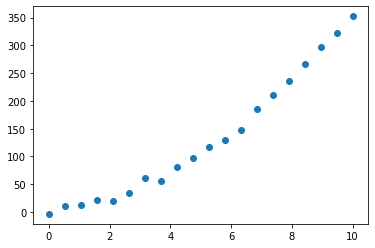

In [80]:
plt.scatter(x,y)
y

In [103]:
def Fit(x,y,n=3):
    
    size = len(x)
    b = y
    
    A = np.ones((len(x),n))
    
    for i in range(1,n):
        A[:,i] = x**(i)
        
    # Hacer  el ajuste
    M = np.dot(A.T,A)
    bt = np.dot(A.T,b)
    
    xsol = np.linalg.solve(M,bt)
    
    return xsol

In [224]:
n = 3
p = Fit(x,y,n=n)
p

array([1.22132054, 6.09075205, 2.9565874 ])

In [225]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

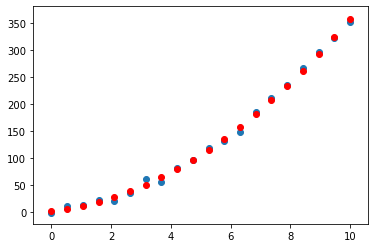

In [226]:
t = np.linspace(0,10,100)
plt.scatter(x,y)
plt.scatter(x, GetModel(x,p), color='r' )

In [227]:
def GetChi2(x,y,p):
    return np.sum( ( y - GetModel(x,p) )**2 )

In [228]:
Chi2 = GetChi2(x,y,p)
Chi2
df = N - n # Grados de libertad
print(df)
print(Chi2/df)

17
32.55960531287638


In [229]:
#l1 = []
#l2 = []
##for i in range(3,20):
 #   p = Fit(x,y,n=i)
 #   Chi2 = GetChi2(x,y,p)
 #   df = N - i
 #   l1.append(i)
 #   l2.append(Chi2/df)

In [230]:
#plt.plot(l1,l2)
#plt.yscale('log')

In [231]:
p

array([1.22132054, 6.09075205, 2.9565874 ])

In [232]:
dict1 = dict(zip(x,y))

In [233]:
dict1

{0.0: -3.348886,
 0.5263158: 10.779,
 1.052632: 13.12721,
 1.578947: 21.20879,
 2.105263: 20.63223,
 2.631579: 34.11089,
 3.157895: 60.66644,
 3.684211: 55.07888,
 4.210526: 81.89598,
 4.736842: 96.83438,
 5.263158: 117.5549,
 5.789474: 130.5394,
 6.315789: 147.7079,
 6.842105: 185.1728,
 7.368421: 210.7779,
 7.894737: 235.0856,
 8.421053: 266.336,
 8.947368: 297.0943,
 9.473684: 322.7923,
 10.0: 352.3838}

In [238]:
def GetBootstrapping( x, n=3, NTrial = int(5e4) ):
    
    Values = np.zeros( (NTrial, n) )
    
    for i in tqdm( range(NTrial) ):
        
        x1 = Bootstrapping(x)
            
        y1 = np.array([])
        for j in x1:
            y1 = np.append(y1,dict1[j])
            
        p = Fit(x1,y1,n=n)
        
        Values[i] = p
    
    return Values

In [239]:
Sample = GetBootstrapping(x,n=3)

100%|██████████| 50000/50000 [00:09<00:00, 5201.87it/s]


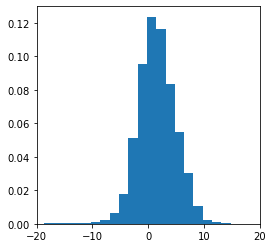

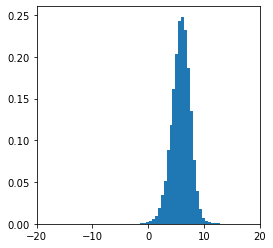

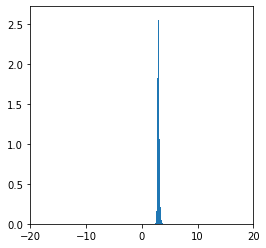

In [243]:
for i in range(3):
    fig = plt.figure(figsize=(4,4))
    plt.hist( Sample[:,i], bins=50, density=True )
    plt.xlim(-20,20)
    